# ConvNets

Submitted by: Ephi Frankel


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD, RMSprop 
from keras.datasets import fashion_mnist # data set
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
# feel free to import whatever else you may need from keras..


Using TensorFlow backend.


### Fashion-MNIST using ConvNets

- Load the Fashion-MNIST dataset used in Ex.11.
- Design and implement a convoulutional network to classify the datasets.
- Train and test your network
- Plot the results (as in Ex.11)

Can you get better results than the fully-connected network from Ex.11 ?


In [13]:
# your code here...
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("X train shape:")
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],28, 28,1)
x_test = x_test.reshape(x_test.shape[0],28, 28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_test = x_test / 255
x_train = x_train / 255
y_train_one_hot = keras.utils.to_categorical(y_train,y_train.max()+1)
y_test_one_hot = keras.utils.to_categorical(y_test,y_test.max()+1)
#ConvNet - LeNet 5
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
print("Network Summary")
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
histories = model.fit(x_train, y_train_one_hot, batch_size=300, epochs = 10,validation_data=(x_test,y_test_one_hot))

X train shape:
(60000, 28, 28)
Network Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 84)                908628    
_________________________________________________________________
dropout_5 (Dropout)          (None, 84)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                850       
Total params: 909,638
Trainable params: 909,638
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [===============

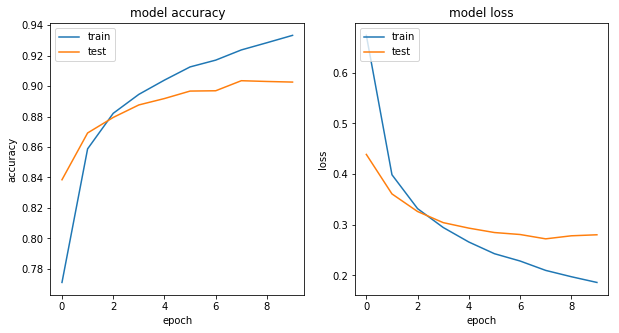

maximal accuracy of current model is: 90.25999969244003%
slight improvment over fully connected network.. 90% vs. ~88%, however I experienced significant increase in training time.


In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histories.history['acc'])
plt.plot(histories.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
lst = len(histories.history['val_acc']) - 1
print("maximal accuracy of current model is: {}%".format(histories.history['val_acc'][lst]*100))
print("slight improvement over fully connected network.. 90% vs. ~88%, however I experienced significant increase in training time.")

### Cats vs Dogs

Based on the famous Kaggle competetion: https://www.kaggle.com/c/dogs-vs-cats/

- Download the small dataset (300 cats and 300 dogs. The full dataset in kaggle has 125,000 images..).
- Preprocess the images: resize to 224x244 and normalize values to [0.0 - 1.0]
- Design and implement a convoulutional network to classify cats vs dogs
- Train and test your network
- Plot the results

What is the maximal test accuracy you achieved?


In [4]:
train_path = 'E:\\DEV\\HIT\\Computer Vision\\Ex. 12\\cats-and-dogs\\train' # fill the path to the train data (with 'cat' and 'dog' subfolders)

train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, 
                                                                       target_size=(224,224), 
                                                                       classes=['dog', 'cat'], 
                                                                       batch_size=32)



#train_imgs, train_labels = next(train_batches) # each time you call next() you get the next batch of images
#print(imgs.shape)
#print(labels.shape)
test_path = 'E:\\DEV\\HIT\\Computer Vision\\Ex. 12\\cats-and-dogs\\test'

test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, 
                                                                       target_size=(224,224), 
                                                                       classes=['dog', 'cat'], 
                                                                       batch_size=32)

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
# your code here..
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
print("Network Summary")
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
histories = model.fit_generator(train_batches, epochs = 10,validation_data=test_batches)

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Network Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 4)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 4)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 8)       296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 8)         584       
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
____________________________________________

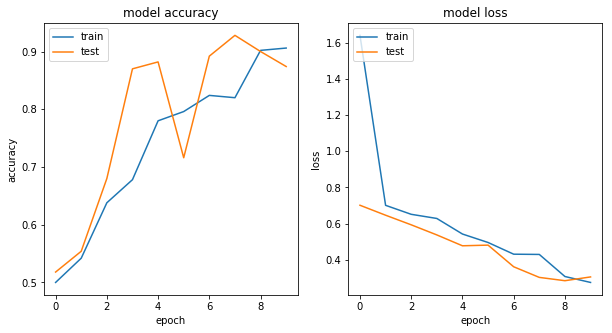

maximal accuracy of current model is: 87.39999890327454%


In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histories.history['acc'])
plt.plot(histories.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
lst = len(histories.history['val_acc']) - 1
print("maximal accuracy of current model is: {}%".format(histories.history['val_acc'][lst]*100))

### Transfer learning (using VGG-16)

- Load the pre-trained VGG16 model. 
- Freeze all the paramers of the model (by setting the `trainable` field in each layer to  `false`).
- Remove the last layer from the model, and replace it by a suitable output layer (with two outputs: for 'cat' and 'dog').
- Train and test the network (only the last layer parameters)
- Plot the results

What is the maximal test accuracy you achieved?


In [ ]:
# your code here..
model = VGG16()
print("Loaded VGG16")
for layer in model.layers:
    layer.trainable = False
model.layers.pop()    
model.layers.pop()
model.layers.pop()
x = model.layers[-1].output
predictions = Dense(2, activation="softmax")(x)
model_final = Model(inputs = model.input,outputs = predictions)
print("Network summary")
model_final.summary()
model_final.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
histories = model_final.fit_generator(train_batches, epochs = 10,validation_data=test_batches)

Loaded VGG16
Network summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128

## Good Luck!